In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from numpy import where as IF 
import scipy.stats as stats

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.



In [15]:
claim = pd.read_csv("E:\Python Case Study\Case Study -4\claims.csv")
cust = pd.read_csv("E:\Python Case Study\Case Study -4\cust_demographics.csv")

In [16]:
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [17]:
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [20]:
claim_cust = pd.merge(right = claim,left = cust,right_on= 'customer_id',left_on = 'CUST_ID', how = 'outer')

In [21]:
claim_cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


###  EDA

In [22]:
claim_cust.shape

(1107, 16)

In [23]:
claim_cust.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
customer_id            float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [24]:
#check null values
claim_cust.isnull().sum()

CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
dtype: int64

In [25]:
#removing null values
claim_cust.dropna(inplace =True)

In [26]:
claim_cust.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.


In [27]:
claim_cust.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
customer_id            float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [28]:
claim_cust['DateOfBirth'] = pd.to_datetime(claim_cust.DateOfBirth, format = "%d-%b-%y")
claim_cust.loc[(claim_cust.DateOfBirth.dt.year > 2020),'DateOfBirth']=claim_cust[claim_cust.DateOfBirth.dt.year > 2020]['DateOfBirth'].apply(lambda x: x - pd.DateOffset(years=100))
claim_cust["claim_date"] = pd.to_datetime(claim_cust.claim_date, format = "%m/%d/%Y")
claim_cust["Contact"] = pd.to_numeric(claim_cust.Contact.str.replace("-",""),downcast = 'float')

In [29]:
claim_cust.dtypes

CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
claim_id                      float64
customer_id                   float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [30]:
claim_cust.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No


#### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $sign.

In [31]:
claim_cust['claim_amount'] = pd.to_numeric(claim_cust.claim_amount.str.replace("$",""),downcast = 'float')

C:\Users\user\AppData\Local\Temp\ipykernel_11356\662783198.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  claim_cust['claim_amount'] = pd.to_numeric(claim_cust.claim_amount.str.replace("$",""),downcast = 'float')


In [32]:
claim_cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [33]:
claim_cust["flag"] = IF(claim_cust.police_report == 'NO', 0, IF(claim_cust.police_report =='Yes',1,np.nan))
claim_cust.drop(columns =["police_report"],inplace= True)

In [34]:
claim_cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,NaN
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,NaN
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,NaN
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,NaN


### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. 
Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.


In [35]:
claim_cust = claim_cust.groupby("CUST_ID").first().reset_index(drop = True)

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [36]:
claim_cust.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,263204.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,NaN
1,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,287476.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
2,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,441097.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
3,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,524545.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,NaN
4,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084.0,608461.0,Crime,2018-07-14,Auto,Material only,2630.0,1.0,No,NaN


In [37]:
claim_cust['incident_cause'].isna().sum()

0

In [38]:
cat_col =["gender","State","incident_cause","claim_area","claim_type","fraudulent","flag"]
con_cal = ["claim_amount"]

In [39]:
for col in cat_col:
    claim_cust[col]= claim_cust[col].fillna(claim_cust[col].mode()[0])
    claim_cust[con_cal]= claim_cust[con_cal].fillna(claim_cust[con_cal].mean())
claim_cust.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,263204.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,1.0
1,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,287476.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,1.0
2,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,441097.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
3,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,524545.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,1.0
4,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084.0,608461.0,Crime,2018-07-14,Auto,Material only,2630.0,1.0,No,1.0


In [40]:
claim_cust["State"].isna().sum()

0

### 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteriaChildren < 18Youth 18-30Adult 30-60 Senior > 60


In [41]:
claim_cust["Age"] = round((claim_cust.claim_date - claim_cust.DateOfBirth).apply(lambda x: x.days)/365.25, 2)

In [42]:
claim_cust["Age_grp"]= IF(claim_cust.Age < 18, "Children",
                          IF(claim_cust.Age < 30, "Youth", 
                             IF(claim_cust.Age <60,"Adult",
                                IF(claim_cust.Age < 100, "Senior", "NaN"
                                   
                                  )
                               )
                            )
                         )
claim_cust["Age_grp"] = claim_cust["Age_grp"].fillna(claim_cust["Age_grp"].mode())
claim_cust.groupby(by ="Age_grp").count()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
Age_grp,,,,,,,,,,,,,,,,
Adult,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693
Children,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Youth,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303


### 8. What is the average amount claimed by the customers from various segments?


In [43]:
claim_cust.groupby(by ="Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12643.390625
Platinum,12426.603516
Silver,12284.386719


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [44]:
claim_cust.loc[claim_cust.claim_date< "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                  662110.0
total_Driver error          3112550.0
total_Natural causes        1181891.5
total_Other causes          3486969.0
total_Other driver error    3053360.0
Name: claim_amount, dtype: float32

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [45]:
claim_cust.loc[(claim_cust.incident_cause.str.lower().str.contains("driver")&((claim_cust.State =='TX') | (claim_cust.State == "DE")| ( claim_cust.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK     8
DE    13
TX     9
Name: State, dtype: int64

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [46]:
f1 = claim_cust.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
f1.head()

,gender,Segment,claim_amount
0,Female,Gold,1937899.0
1,Female,Platinum,2278700.0
2,Female,Silver,1736442.0
3,Male,Gold,2398784.0
4,Male,Platinum,1996051.5


In [47]:
res = f1.pivot(index = "Segment", columns = "gender", values = "claim_amount")

In [48]:
res

gender,Female,Male
Segment,,
Gold,1937899.0,2398784.0
Platinum,2278700.0,1996051.5
Silver,1736442.0,2157708.5


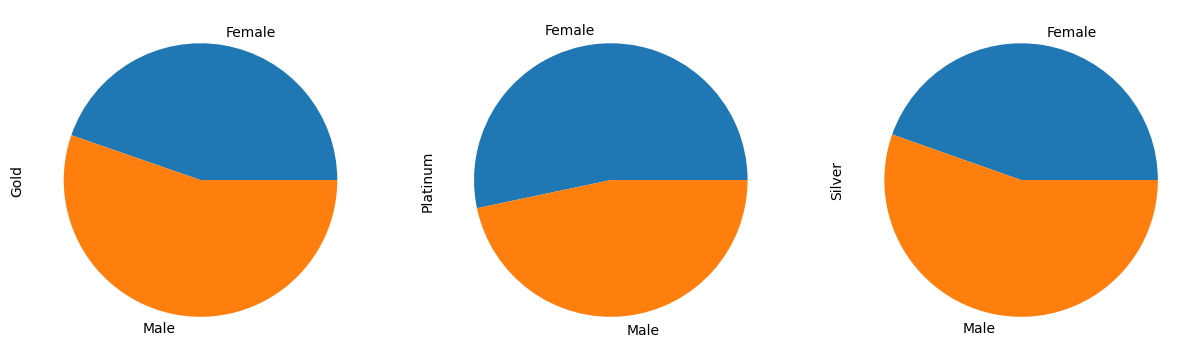

In [49]:
res.T.plot(kind= "pie",subplots = True, legend = False, figsize = (15,8))
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [50]:
f2= claim_cust.loc[(claim_cust.incident_cause.str.lower().str.contains("driver"))].groupby( by = "gender")[["gender"]].count().add_prefix("countof_").reset_index()

In [51]:
f2

,gender,countof_gender
0,Female,204
1,Male,261


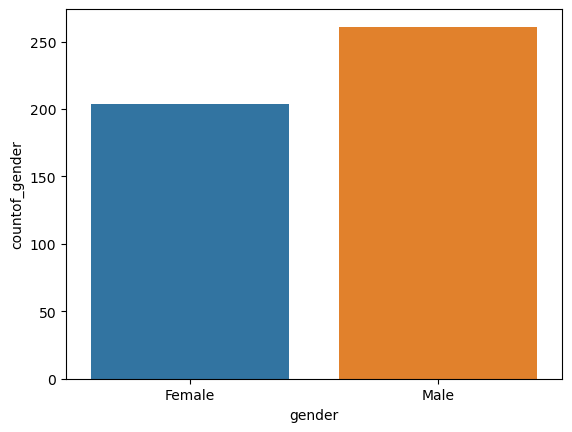

In [52]:
sns.barplot(x ="gender", y= "countof_gender",data = f2)
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


In [53]:
claim_cust.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,263204.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,1.0,45.29,Adult
1,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,287476.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,1.0,29.22,Youth
2,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,441097.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0,46.59,Adult
3,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,524545.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,1.0,37.96,Adult
4,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084.0,608461.0,Crime,2018-07-14,Auto,Material only,2630.0,1.0,No,1.0,23.57,Youth


In [54]:
Age_grp_frud= claim_cust.groupby(by="Age_grp")[["fraudulent"]].count().reset_index()
Age_grp_frud

,Age_grp,fraudulent
0,Adult,693
1,Children,8
2,Youth,303


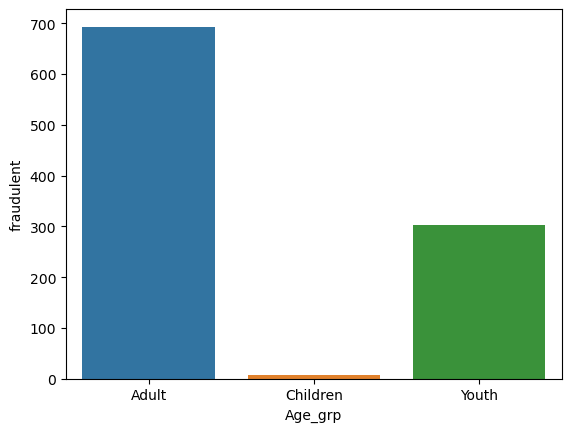

In [55]:
sns.barplot(x = "Age_grp" , y = "fraudulent", data = Age_grp_frud)
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [56]:
claim_cust.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,263204.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,1.0,45.29,Adult
1,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,287476.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,1.0,29.22,Youth
2,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,441097.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0,46.59,Adult
3,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,524545.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,1.0,37.96,Adult
4,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084.0,608461.0,Crime,2018-07-14,Auto,Material only,2630.0,1.0,No,1.0,23.57,Youth


In [57]:
monthly_trend = claim_cust.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()

In [58]:
monthly_trend

,claim_date,claim_amount
0,2017-01-01,203227.0
1,2017-01-07,137763.5
2,2017-01-14,138807.5
3,2017-01-21,47635.5
4,2017-01-27,44327.5
...,...,...
95,2018-10-03,150327.0
96,2018-10-09,225007.5
97,2018-10-16,119829.0
98,2018-10-23,122143.0


In [59]:
monthly_trend['Monthly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format = "%B"))
monthly_trend['yearly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x, format = "%Y"))

In [60]:
monthly_trend.head()

,claim_date,claim_amount,Monthly,yearly
0,2017-01-01,203227.0,January,2017
1,2017-01-07,137763.5,January,2017
2,2017-01-14,138807.5,January,2017
3,2017-01-21,47635.5,January,2017
4,2017-01-27,44327.5,January,2017


In [61]:
monthly_trend = monthly_trend.groupby(["Monthly"])[["claim_amount"]].sum().reset_index()
monthly_trend

,Monthly,claim_amount
0,April,1248750.5
1,August,833982.0
2,December,682141.0
3,February,1064645.0
4,January,1243588.5
5,July,1266800.5
6,June,1201510.0
7,March,1237921.5
8,May,1014447.5
9,November,576184.0


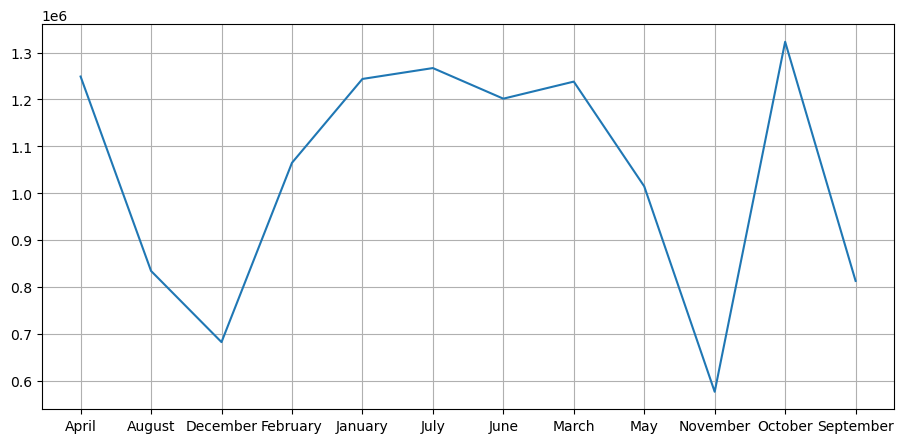

In [62]:
plt.figure( figsize = (11,5))
plt.plot(monthly_trend['Monthly'], monthly_trend['claim_amount'],label = 'Trend line')
plt.grid()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [63]:
Avg_claim_amt = claim_cust.groupby(["gender","Age_grp","fraudulent"])[["claim_amount"]].mean().reset_index()

In [64]:
Avg_claim_amt

,gender,Age_grp,fraudulent,claim_amount
0,Female,Adult,No,12483.003906
1,Female,Adult,Yes,12461.482422
2,Female,Children,No,11210.000000
3,Female,Youth,No,12311.229492
4,Female,Youth,Yes,6990.203125
5,Male,Adult,No,12008.627930
6,Male,Adult,Yes,17294.689453
7,Male,Children,No,18316.000000
8,Male,Children,Yes,32407.000000
9,Male,Youth,No,12171.565430


In [65]:
Avg_claim_amt_male = Avg_claim_amt.loc[Avg_claim_amt.gender == "male"],["claim_amount","Age_grp","fraudulent"]
Avg_claim_amt_female = Avg_claim_amt.loc[Avg_claim_amt.gender == "female"],["claim_amount","Age_grp","fraudulent"]

In [66]:
Avg_claim_amt_male_fraudulent = Avg_claim_amt_male.loc[ Avg_claim_amt.fraudulent == "Yes",(["claim_amount","Age_grp"])]
Avg_claim_amt_male_nonfraudulent = Avg_claim_amt_male.loc[ Avg_claim_amt.fraudulent == "No",["claim_amount","Age_grp"]]
Avg_claim_amt_female_fraudulent = Avg_claim_amt_female.loc[ Avg_claim_amt.fraudulent == "Yes",["claim_amount","Age_grp"]]
Avg_claim_amt_female_nonfraudulent = Avg_claim_amt_female.loc[ Avg_claim_amt.fraudulent == "No",["claim_amount","Age_grp"]]

AttributeError: 'tuple' object has no attribute 'loc'

In [67]:
Avg_claim_amt_male_fraudulent = Avg_claim_amt_male.loc[ Avg_claim_amt.fraudulent == 'Yes', ['claim_amount','Age_grp'] ]

AttributeError: 'tuple' object has no attribute 'loc'

##### 16. Is there any similarity in the amount claimed by males and females?

Null Hypothesis:
         H0 : There is no similarity between average amount claimed by male and female.
         
    Alternate Hypothesis
         H1 : There is similarity between average amount claimed by male and female.
         
    Defining Ci and p - value
          ci = 95%
          p-value = 0.05
          significance level = 1.960
          
    Perform Test
          f-test = f_oneway 

In [68]:
male = claim_cust[claim_cust.loc[:,'gender'] == 'Male']['claim_amount']
male.head(2)

0    39192.0
1     1621.5
Name: claim_amount, dtype: float32

In [69]:
female = claim_cust[claim_cust.loc[:,'gender'] == 'Female']['claim_amount']
female.head(2)

3    35250.0
6    21190.0
Name: claim_amount, dtype: float32

In [70]:
stats.f_oneway(male,female)

F_onewayResult(statistic=0.7393885818260069, pvalue=0.3900624877360075)

##### Conclusion

HERE new p-value > p-value Therefore, we accept the null hypothesis. "There is no similarity b/w average amount claimed by male and female.    


#### 17. Is there any relationship between age category and segment?

    Null Hypothesis:
        H0: There is no relationship between age category and segment.
        
    Alternate Hypothesis:
        H1: There is relationship between age category and segment.
        
    Defining CI and P-value:
        CI = 95%
        P-value = 0.05
        significance level = 1.960
        
    Perform test
        chi-squared test = chi2_contingency(obs_freq)

In [71]:
obs_freq = pd.crosstab(index = claim_cust.Age_grp, columns= claim_cust.Segment )
obs_freq

Segment,Gold,Platinum,Silver
Age_grp,,,
Adult,244,226,223
Children,4,4,0
Youth,95,114,94


In [72]:
stats.chi2_contingency(obs_freq)

Chi2ContingencyResult(statistic=6.273504620900387, pvalue=0.1796326590213284, dof=4, expected_freq=array([[236.75199203, 237.44223108, 218.80577689],
       [  2.73306773,   2.74103586,   2.52589641],
       [103.51494024, 103.81673307,  95.66832669]]))

####  Colclusion

Since new p-value > 0.05 Therefore, we accept the H0 that there is no relationshio b/w age category and segment.



##### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

  Null Hypotheses:
        H0: u of 2016-17 <= $10,000


    Alternate Hypothesis:
        H1: u of 2017-2018 >= $10,000


    Defining Ci and p-value:
        CI = 95%
        p-value = 0.05
        significance level = 1.960
        
        
    Perform test:
       one tail t_test = ttest_1samp

In [73]:
start_date = pd.to_datetime('2018-04-01')
end_date = pd.to_datetime('2019-03-31')
curr_fiscal_year = claim_cust[(claim_cust['claim_date'] >= start_date) & (claim_cust['claim_date']<= end_date)]
curr_fiscal_year

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,263204.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,1.0,45.29,Adult
3,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,524545.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,1.0,37.96,Adult
4,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084.0,608461.0,Crime,2018-07-14,Auto,Material only,2630.0,1.0,No,1.0,23.57,Youth
5,Male,1977-08-03,AK,6.133853e+09,Gold,7238381.0,684748.0,Other driver error,2018-07-14,Auto,Material only,2920.0,2.0,No,1.0,40.94,Adult
8,Female,1960-07-29,OR,7.367259e+09,Silver,50906515.0,1123356.0,Crime,2018-08-23,Auto,Material only,2507.0,5.0,Yes,1.0,58.07,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Female,1989-09-10,NJ,3.423130e+09,Gold,70156112.0,98537509.0,Driver error,2018-06-03,Auto,Material and injury,20033.0,3.0,Yes,1.0,28.73,Youth
996,Female,1993-11-11,ID,8.234826e+09,Platinum,17871003.0,98905793.0,Other driver error,2018-09-19,Auto,Material only,3139.5,3.0,Yes,1.0,24.85,Youth
999,Male,1965-01-28,UT,5.175625e+09,Silver,4549014.0,99674324.0,Other causes,2018-07-07,Auto,Injury only,21480.0,1.0,No,1.0,53.44,Adult
1001,Female,1963-11-18,NC,6.432465e+09,Silver,37305754.0,99761663.0,Natural causes,2018-04-04,Auto,Material only,1242.0,1.0,Yes,1.0,54.38,Adult


In [74]:
stats.ttest_1samp(curr_fiscal_year.claim_amount, 10000)

TtestResult(statistic=2.9186717615490703, pvalue=0.003771674863897993, df=311)

#####   Business Conclusion
Since new p-value < 0.05 , so we reject the null hypothesis " Average claim amount of current year is greater than that of 2016-2017"

##### 19. Is there any difference between age groups and insurance claims?

    Null Hypothesis:
    H0: There is no difference between age groups and insurance claims
    
    Alternate Hypothesis:
    H1: There is difference between age groups and insurance claims
    
    Defining CI and p-value:
    CI = 95%
    P-Value = 0.05
    significance level = 1.960
    
    Performed test:
    chi-square = chi2_contingency

In [75]:
obs_freq = pd.crosstab(index = claim_cust.claim_type, columns = claim_cust.claim_type)
obs_freq

claim_type,Injury only,Material and injury,Material only
claim_type,,,
Injury only,179,0,0
Material and injury,0,224,0
Material only,0,0,601


In [76]:
stats.chi2_contingency(obs_freq)

Chi2ContingencyResult(statistic=2007.9999999999998, pvalue=0.0, dof=4, expected_freq=array([[ 31.91334661,  39.93625498, 107.15039841],
       [ 39.93625498,  49.97609562, 134.0876494 ],
       [107.15039841, 134.0876494 , 359.76195219]]))

###### Conclusion:
Since 0.044660903351227625 < 0.05 "We reject the Null Hypothesis, i.e., there is difference b/w age groups and insurance claims"

##### 20. Is there any relationship between total number of policy claims and the claimed amount?
  Null Hypothesis
        H0 :  There is no relationship b/w total no. of policy claims and claim_amount
        
    Alternative Hypothesis
        H1 :  There is relationship b/w total no. of policy claims and claim_amount
        
        Defining CI and P-value
        CI = 95%
        P-value = 0.05
        Significance level = 1.960
        
    Performed test
        pearsonr

In [79]:
stats.pearsonr(claim_cust.claim_amount, claim_cust.total_policy_claims)

PearsonRResult(statistic=-0.014822956274526447, pvalue=0.6389836766917203)

##### Conclusion: 
Since new p-value > 0.05 , so we accept the Null Hypothesis i.e., there is no relationship b/w both.